In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table

In [2]:
inputdir = '/Users/orion/RDaly2023/mcmc-fitting/'

In [17]:
df = pd.read_csv(inputdir+'Zhu_Rakshit_flagged_final367.csv', header=0, usecols=[0,1,4,5,8,9])#, nrows=20)
df

,SDSS Name,z_1,Log(L_5 GHz),Log(2 keV),logMBH,e_logMBH
0,000442.18+000023.3,1.008,32.09,26.91,9.281283,0.031152
1,000622.60-000424.4,1.038,34.94,27.32,8.823198,0.059579
2,001646.54-005151.7,2.243,32.66,26.36,9.011771,0.240900
3,001910.95+034844.6,2.022,32.91,26.54,8.696172,0.037866
4,003054.63+045908.4,2.201,33.81,26.59,8.688945,0.189143
...,...,...,...,...,...,...
362,222852.60-075346.6,0.638,33.12,26.83,8.546475,0.068004
363,231156.65+015324.5,2.257,32.54,26.34,8.784155,0.118988
364,232734.73+002234.0,1.494,33.56,26.96,9.709295,0.111279
365,234808.62+020725.8,1.872,32.84,26.61,9.817211,0.082521


In [4]:
df.rename(columns={'Log(L_5 GHz)':'logR', 'Log(2 keV)': 'logX'}, inplace=True)

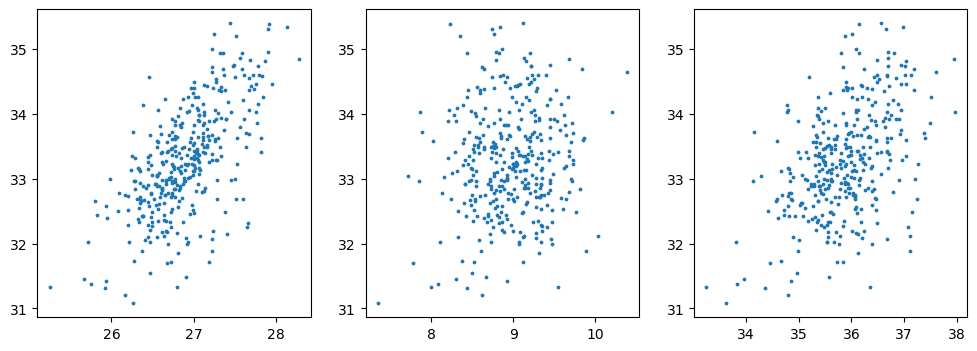

In [5]:
#check for linearity
fig, ax = plt.subplots(1,3, figsize=(12, 4))

ax[0].scatter(df['logX'], df['logR'], s=3)
ax[1].scatter(df['logMBH'], df['logR'], s=3)
ax[2].scatter(df['logMBH']+df['logX'], df['logR'], s=3)

In [6]:
x = df[['logX','logMBH']]
y = df['logR']

In [7]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 2.0900948681446394
Coefficients: 
 [ 1.22991513 -0.21248548]


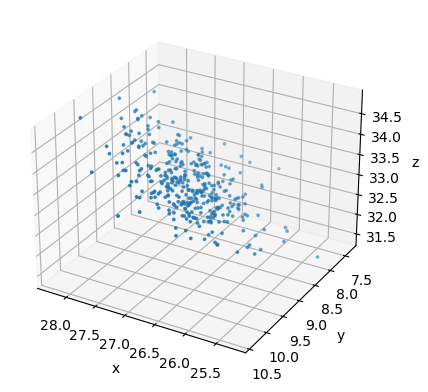

In [16]:
from mpl_toolkits import mplot3d

def f(X,Y,M1,M2,C):
    return M1*X + M2*Y + C

fig = plt.figure()
ax = plt.axes(projection='3d')

x0 = df['logX']
y0 = df['logMBH']
#z = df['logR']
z0 = f(x0,y0,regr.coef_[0],regr.coef_[1],regr.intercept_)

ax.scatter3D(x0, y0, z0, s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=28, azim=120)

In [13]:
import statsmodels.api as sm

In [14]:
x = df[['logX','logMBH']]
y = df['logR']

In [15]:
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   logR   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     135.0
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.38e-44
Time:                        01:22:35   Log-Likelihood:                -353.00
No. Observations:                 367   AIC:                             712.0
Df Residuals:                     364   BIC:                             723.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0901      1.935      1.080      0.2